# Indroduction

The dataset is formed by a single 60 years old man, which is diagnosed with initial stage of kidney stones. Doctor recommended:

- to keep pH level on average level (pH: 6.0 - 6.5) to stop forming of new stones

Measurements of pH were made on everyday basis almost without errors or misses on track. With pH measurements all the food (and some other conditions like gym) were accurately logged. 

Dataset contains: 
 - 212 rows (days)
 - 99 columns (pH measures, various liquids, various foods)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm
import random
from scipy import stats
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Data overview

Observations

- Variables differ from each other: liquids are continious and foods are categorial
- There are many missing values in various food columns

Decisions:

- I will only use PH_avg as my target pH measure
- I will transform food variables into binominal type

In [39]:
df = pd.read_csv('ph_v1_days.csv')
df.head()

,Date,PH_morning,PH_midday,PH_evening,PH_avg,Ailment,Gym,Liquid,Lemon water,Tea(black/green),...,Cookie,Cake,Bun,Croissant,Chocolate,Candies,Halva,Marshmallow,Red caviar,Jelly
0,06.09.2017,5.41,5.25,5.55,5.40,NaN,NaN,1300,250.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07.09.2017,7.06,5.70,5.32,6.03,NaN,1.0,1300,250.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08.09.2017,6.26,5.75,5.43,5.81,NaN,NaN,1350,250.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09.09.2017,5.35,6.85,6.09,6.10,NaN,NaN,2350,250.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.09.2017,6.62,6.34,5.23,6.06,NaN,1.0,1600,250.0,NaN,...,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 99 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          212 non-null    object 
 1   PH_morning                    212 non-null    float64
 2   PH_midday                     212 non-null    float64
 3   PH_evening                    210 non-null    float64
 4   PH_avg                        212 non-null    float64
 5   Ailment                       17 non-null     float64
 6   Gym                           62 non-null     float64
 7   Liquid                        212 non-null    int64  
 8   Lemon water                   190 non-null    float64
 9   Tea(black/green)              21 non-null     float64
 10  Fruit tea                     205 non-null    float64
 11  Water                         164 non-null    float64
 12  Latte                         17 non-null     float64
 13  Miner

# Data exploration and visualization

In [41]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))
    
#display(df.groupby('Gym').describe().iloc[:,0:2])
d_1 = df.groupby(r'Tea(black/green)').describe().iloc[:,0:2]
d_2 = df.groupby(r'Mineral water (Esentuki - 4)').describe().iloc[:,0:2]
d_3 = df.groupby(r'Mineral water (Prolom)').describe().iloc[:,0:2]
#display(df.groupby('Morse').describe().iloc[:,0:2])
#display(df.groupby('Orange juice').describe().iloc[:,0:2])
#display(df.groupby('Pizza with meat').describe().iloc[:,0:2])
#display(df.groupby('Bread').describe().iloc[:,0:2])
#display(df.groupby('Meat').describe().iloc[:,0:2])
#display(df.groupby('Cheese').describe().iloc[:,0:2])
#display(df.groupby('Curd').describe().iloc[:,0:2])
#display(df.groupby('Potato dumplings').describe().iloc[:,0:2])
#display(df.groupby('Fried potatoes').describe().iloc[:,0:2])
#display(df.groupby('Patty with cabbage').describe().iloc[:,0:2])
#display(df.groupby('The nuts').describe().iloc[:,0:2])
#display(df.groupby('Pumpkin seeds').describe().iloc[:,0:2])
#display(df.groupby('Dried apricots').describe().iloc[:,0:2])
#display(df.groupby('Vegetable salad').describe().iloc[:,0:2])
#display(df.groupby('Apple').describe().iloc[:,0:2])
#display(df.groupby('Banana').describe().iloc[:,0:2])
#display(df.groupby('Paste').describe().iloc[:,0:2])
#display(df.groupby('Ice cream').describe().iloc[:,0:2])
#display(df.groupby('Cookie').describe().iloc[:,0:2])
#display(df.groupby('Cake').describe().iloc[:,0:2])
#display(df.groupby('Candies').describe().iloc[:,0:2])
display_side_by_side([d_1, d_2, d_3], ['Average pH by Gym', r'Average pH by Tea(black/green)','Average pH by Mineral water (Esentuki - 4)' ])

Text(0.5, 1.0, 'Tea(black/green) influence on average pH')

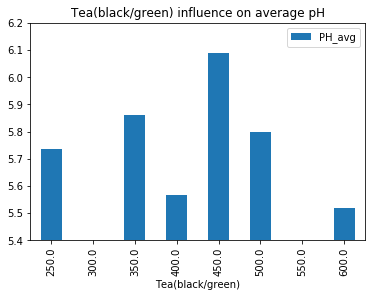

In [42]:
tea_df = pd.DataFrame(df.groupby(r'Tea(black/green)')['PH_avg'].mean())
tea_df.plot(kind = 'bar', y = 'PH_avg')
plt.ylim([5.4,6.2])
plt.title('Tea(black/green) influence on average pH')

Text(0.5, 1.0, 'Mineral water (Prolom) influence on average pH')

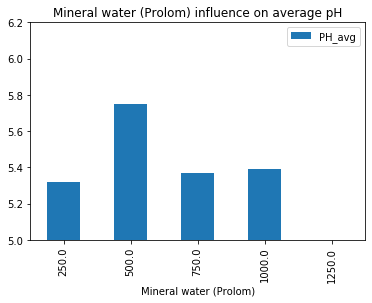

In [43]:
pro_df = pd.DataFrame(df.groupby(r'Mineral water (Prolom)')['PH_avg'].mean())
pro_df.plot(kind = 'bar', y = 'PH_avg')
plt.ylim([5.0,6.2])
plt.title(r'Mineral water (Prolom) influence on average pH')

Text(0.5, 1.0, 'Mineral water (Esentuki - 4) influence on average pH')

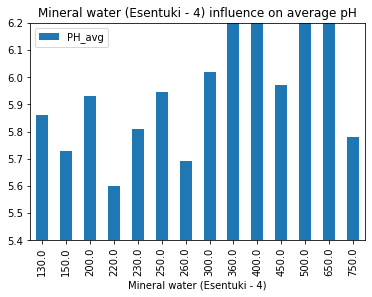

In [44]:
ese_df = pd.DataFrame(df.groupby(r'Mineral water (Esentuki - 4)')['PH_avg'].mean())
ese_df.plot(kind = 'bar', y = 'PH_avg')
plt.ylim([5.4,6.2])
plt.title(r'Mineral water (Esentuki - 4) influence on average pH')

# Exploration conclusions

I tried to choose the independent variables with significant amount of datapoints and compare the pH averages between the days with and without those variables.

I can not see any significant changes in the pH according to those variables. The strongest change was displayed by two types of mineral water and tea (black/green) 

I have visualized those differences between pH, but we have to keep in mind, that the amount of datapoints is different and that may be the reason of pH differences.

### **This also confirms that urine pH result depends on many variables and I will try to use as many of them as possible in my Logistic regression**

# Data transformation

Since column 'Liquid' contains the sum of all liquids - I have two options to solve issue of multicollinearity: 
- either I remove the 'Liquid' column
- or I remove all other columns from which 'Liquid was derived

I choose to remove the Liquid column since my all dataset is binominal

In [45]:
df.drop(['Liquid', 'Date', 'PH_midday', 'PH_morning', 'PH_evening'], axis = 1, inplace = True)
df.iloc[:,1:] = df.iloc[:,1:].notnull().astype('int')
df.head()

,PH_avg,Ailment,Gym,Lemon water,Tea(black/green),Fruit tea,Water,Latte,Mineral water (Esentuki - 4),Mineral water (Borjomi),...,Cookie,Cake,Bun,Croissant,Chocolate,Candies,Halva,Marshmallow,Red caviar,Jelly
0,5.40,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.03,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.81,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.10,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.06,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Focus variable

It was mentioned before, that doctor recommended to keep urine pH at 6.0 - 6.5

Such pH covers around 35 % of the whole dataset

In [46]:
def outcome(x):
    if 6.0 <= x <= 6.5:
        return 1
    else:
        return 0
df['outcome'] = df['PH_avg'].apply(outcome)

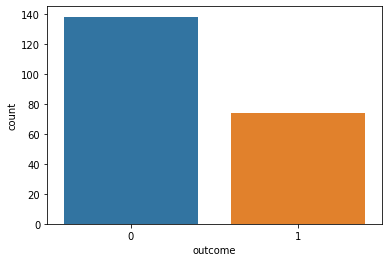

pH 6.0 - 6.5:  74 ( 34.91 %)
Other pH:  138 ( 65.09 %)


In [47]:
sns.countplot(x = 'outcome',
              data = df,
              order = df['outcome'].value_counts().index)
plt.show()
No, Yes = df.outcome.value_counts()
print('pH 6.0 - 6.5: ', Yes,  '(',round(Yes/len(df.outcome)*100,2), '%)')
print('Other pH: ', No,  '(',round(No/len(df.outcome)*100,2), '%)')

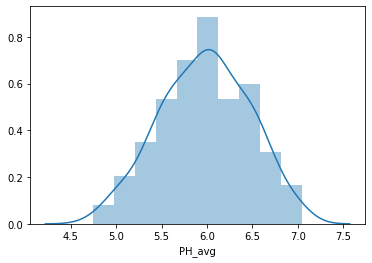

In [48]:
sns.distplot(df['PH_avg'])

# 1. Logistic regression with imbalanced classes

### 1.1 All variables, class weight = None

In [49]:
X = df.drop(['outcome', 'PH_avg'], axis = 1)
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logistic1 = LogisticRegression()
logistic1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

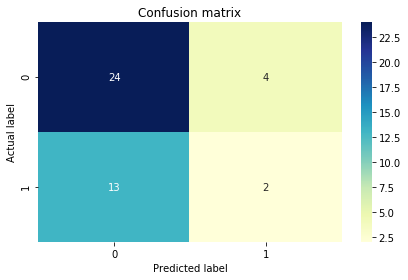

In [50]:
predictions = logistic1.predict(X_test)
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot = True, cmap = 'YlGnBu')
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.tight_layout()

In [51]:
predictions = logistic1.predict(X_test)
print(classification_report(y_test, predictions))
print('Area under the curve:\t', metrics.roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74        28
           1       0.33      0.13      0.19        15

    accuracy                           0.60        43
   macro avg       0.49      0.50      0.46        43
weighted avg       0.54      0.60      0.55        43

Area under the curve:	 0.4952380952380953


### 1.2 All variables, class weight = {0:1,1:2}

In [52]:
X = df.drop(['outcome', 'PH_avg'], axis = 1)
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logistic1 = LogisticRegression(class_weight = {0:1,1:2})
logistic1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

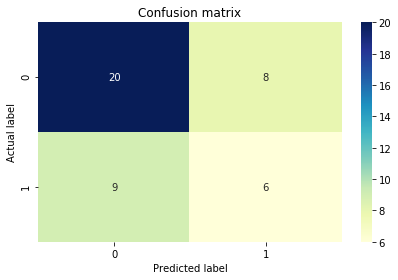

In [53]:
predictions = logistic1.predict(X_test)
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot = True, cmap = 'YlGnBu')
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.tight_layout()

In [54]:
predictions = logistic1.predict(X_test)
print(classification_report(y_test, predictions))
print('Area under the curve:\t', metrics.roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        28
           1       0.43      0.40      0.41        15

    accuracy                           0.60        43
   macro avg       0.56      0.56      0.56        43
weighted avg       0.60      0.60      0.60        43

Area under the curve:	 0.5571428571428572


### 1.3 Selected variables, class weight = None

In [55]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
           k_features=25,
           forward=True,
           floating=False,
           scoring = 'f1',
           cv = 0)
sfs.fit(X, y)
sfs.k_feature_names_
f1_features = list(sfs.k_feature_names_)

In [56]:
X = df.drop(['outcome', 'PH_avg'], axis = 1)[f1_features]
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logistic1 = LogisticRegression()
logistic1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

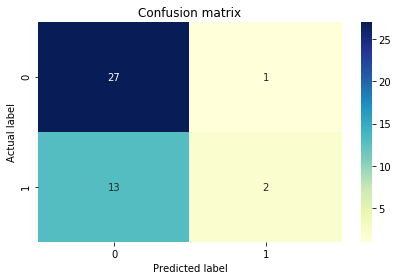

In [57]:
predictions = logistic1.predict(X_test)
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot = True, cmap = 'YlGnBu')
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.tight_layout()

In [58]:
predictions = logistic1.predict(X_test)
print(classification_report(y_test, predictions))
print('Area under the curve:\t', metrics.roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.96      0.79        28
           1       0.67      0.13      0.22        15

    accuracy                           0.67        43
   macro avg       0.67      0.55      0.51        43
weighted avg       0.67      0.67      0.59        43

Area under the curve:	 0.5488095238095237


### 1.4 Selected variables, class weight = {0:1,1:2}

In [59]:
X = df.drop(['outcome', 'PH_avg'], axis = 1)[f1_features]
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logistic1 = LogisticRegression(class_weight = {0:1,1:2})
logistic1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

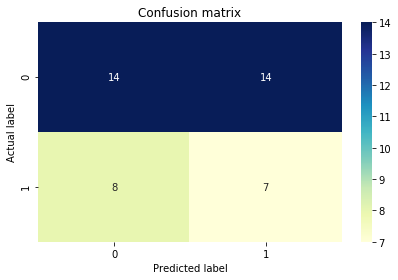

In [60]:
predictions = logistic1.predict(X_test)
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot = True, cmap = 'YlGnBu')
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.tight_layout()

In [61]:
predictions = logistic1.predict(X_test)
print(classification_report(y_test, predictions))
print('Area under the curve:\t', metrics.roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56        28
           1       0.33      0.47      0.39        15

    accuracy                           0.49        43
   macro avg       0.48      0.48      0.47        43
weighted avg       0.53      0.49      0.50        43

Area under the curve:	 0.4833333333333334


# 2. Logistic regression with balanced classes

In [62]:
bad = df[df['outcome'] == 0].sample(n = len(df[df['outcome'] == 1]))
df2 = df[df['outcome'] == 1]
df2 = df2.append(bad)
df2['outcome'].value_counts()

1    74
0    74
Name: outcome, dtype: int64

### 2.1 All variables, class weight = None

In [63]:
X = df2.drop(['outcome', 'PH_avg'], axis = 1)
y = df2['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logistic1 = LogisticRegression()
logistic1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

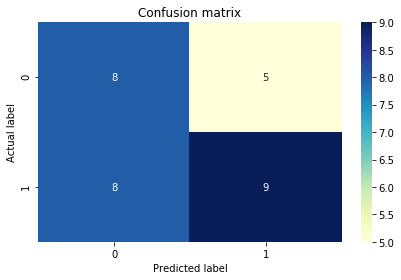

In [64]:
predictions = logistic1.predict(X_test)
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot = True, cmap = 'YlGnBu')
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.tight_layout()

In [65]:
predictions = logistic1.predict(X_test)
print(classification_report(y_test, predictions))
print('Area under the curve:\t', metrics.roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.62      0.55        13
           1       0.64      0.53      0.58        17

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.58      0.57      0.57        30

Area under the curve:	 0.5723981900452488


### 2.2 All variables, class weight = {0:1,1:2}

In [66]:
X = df2.drop(['outcome', 'PH_avg'], axis = 1)
y = df2['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logistic1 = LogisticRegression(class_weight = {0:1,1:2})
logistic1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

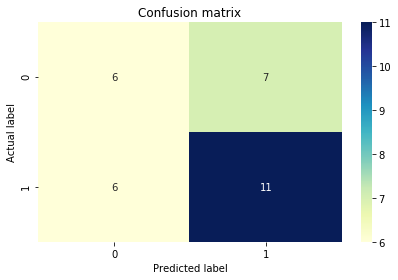

In [67]:
predictions = logistic1.predict(X_test)
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot = True, cmap = 'YlGnBu')
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.tight_layout()

In [68]:
predictions = logistic1.predict(X_test)
print(classification_report(y_test, predictions))
print('Area under the curve:\t', metrics.roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48        13
           1       0.61      0.65      0.63        17

    accuracy                           0.57        30
   macro avg       0.56      0.55      0.55        30
weighted avg       0.56      0.57      0.56        30

Area under the curve:	 0.5542986425339367


### 2.3 Selected variables, class weight = None

In [69]:
X = df2.drop(['outcome', 'PH_avg'], axis = 1)[f1_features]
y = df2['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logistic1 = LogisticRegression()
logistic1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

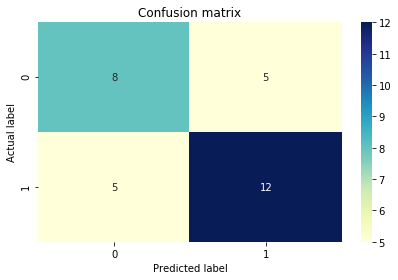

In [70]:
predictions = logistic1.predict(X_test)
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot = True, cmap = 'YlGnBu')
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.tight_layout()

In [71]:
predictions = logistic1.predict(X_test)
print(classification_report(y_test, predictions))
print('Area under the curve:\t', metrics.roc_auc_score(y_test, predictions))
print('Selected variables:\t', f1_features)

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.71      0.71      0.71        17

    accuracy                           0.67        30
   macro avg       0.66      0.66      0.66        30
weighted avg       0.67      0.67      0.67        30

Area under the curve:	 0.660633484162896
Selected variables:	 ['Ailment', 'Fruit tea', 'Water', 'Latte', 'Mineral water (Borjomi)', 'Tequila', 'Red wine', 'Strong alcohol', 'Beer', 'Morse', 'Milk', 'Cheese Pizza', 'Cheesecakes', 'Meat', 'Sauce', 'Fish', 'Sushi', 'Potato dumplings', 'Zucchini Fritters', 'Egg Pie', 'Potato pie', 'Eggplant caviar', 'Pear', 'Grapes', 'Cake']


### 2.4 Selected variables, class weight = {0:1,1:2}

In [72]:
X = df2.drop(['outcome', 'PH_avg'], axis = 1)[f1_features]
y = df2['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logistic1 = LogisticRegression(class_weight = {0:1,1:2})
logistic1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

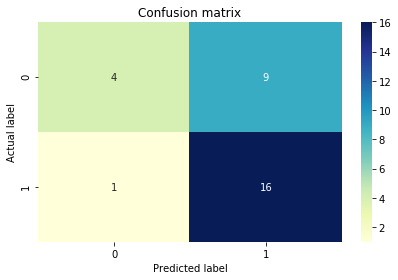

In [73]:
predictions = logistic1.predict(X_test)
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot = True, cmap = 'YlGnBu')
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.tight_layout()

In [74]:
predictions = logistic1.predict(X_test)
print(classification_report(y_test, predictions))
print('Area under the curve:\t', metrics.roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.31      0.44        13
           1       0.64      0.94      0.76        17

    accuracy                           0.67        30
   macro avg       0.72      0.62      0.60        30
weighted avg       0.71      0.67      0.62        30

Area under the curve:	 0.6244343891402715


# Conclusions

I have tried balancing the classes and selecting the features so I can see that best overall model is:

- 2.3 - Selected variables, class weight = None (balanced classes). It has the best AUC

- 2.4 Model is also very good, but it sacrifises a lot of outcome '0' recall, because of the class weight feature. I cannot accept that. Also it has lesser AUC

I accept the f1_features list, selected by SequentialFeatureSelector, because the list contains variables from different categories - liquids, proteins, sweets, carbohydrates, fat.

I can see that balancing the classes worked better than having imbalanced classes and using class_weight. This is because dataset is small and has a lot of independant variables. Having one class bigger with a lot of independant variables, results in greater variance in one group than the other. 

